# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [93]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [95]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [97]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [98]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [99]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [100]:
df.groupby('title').count()

,lat,lng,desc,zip,timeStamp,twp,addr,e
title,,,,,,,,
EMS: ABDOMINAL PAINS,1436,1436,1436,1354,1436,1436,1436,1436
EMS: ACTIVE SHOOTER,2,2,2,2,2,2,2,2
EMS: ALLERGIC REACTION,438,438,438,410,438,438,438,438
EMS: ALTERED MENTAL STATUS,1386,1386,1386,1300,1386,1385,1386,1386
EMS: AMPUTATION,14,14,14,12,14,14,14,14
...,...,...,...,...,...,...,...,...
Traffic: HAZARDOUS ROAD CONDITIONS -,1086,1086,1086,969,1086,1085,1068,1086
Traffic: ROAD OBSTRUCTION -,3144,3144,3144,2505,3144,3144,3127,3144
Traffic: VEHICLE ACCIDENT -,23066,23066,23066,19536,23066,23066,22910,23066


In [101]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [102]:
reason = df['title'].apply(lambda x : x.split(':')[0])
df.insert(6,'Reason', reason)

In [103]:
df

,lat,lng,desc,zip,title,timeStamp,Reason,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,EMS,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,EMS,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,Fire,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,EMS,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,EMS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,Traffic,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,Traffic,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,EMS,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,EMS,HORSHAM,WELSH RD & WEBSTER LN,1


** What is the most common Reason for a 911 call based off of this new column? **

In [104]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

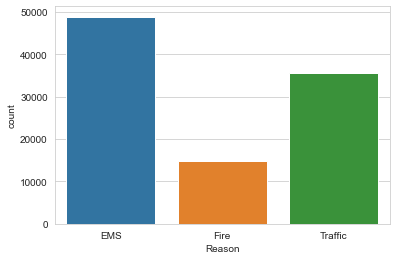

In [105]:
import seaborn as sns
sns.countplot(data=df, x='Reason')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [106]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [107]:
time = df['timeStamp'].iloc[0]
pd.to_datetime(time)

Timestamp('2015-12-10 17:40:00')

In [108]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [109]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df

,lat,lng,desc,zip,title,timeStamp,Reason,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,EMS,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,EMS,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,Fire,NORRISTOWN,HAWS AVE,1,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,EMS,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,EMS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,Traffic,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,Traffic,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,EMS,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,EMS,HORSHAM,WELSH RD & WEBSTER LN,1,11,8,2


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [110]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [111]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

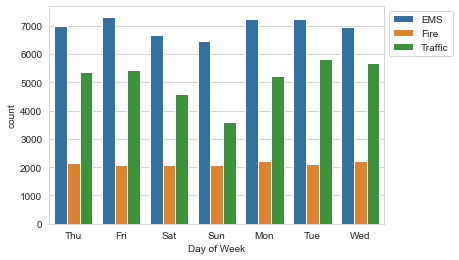

In [112]:
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(loc=0,bbox_to_anchor=(1, 1))

**Now do the same for Month:**

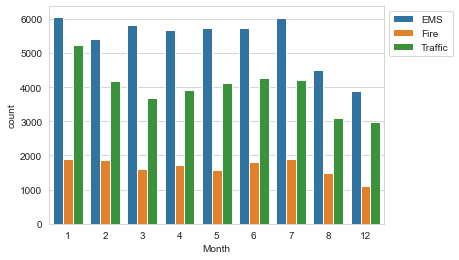

In [113]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(loc=2,bbox_to_anchor=(1, 1))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [114]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,Reason,twp,addr,e,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7963,7916,7969,7969,7969


In [115]:
byMonth.head

<bound method NDFrame.head of          lat    lng   desc    zip  title  timeStamp  Reason    twp   addr  \
Month                                                                       
1      13205  13205  13205  11527  13205      13205   13205  13203  13096   
2      11467  11467  11467   9930  11467      11467   11467  11465  11396   
3      11101  11101  11101   9755  11101      11101   11101  11092  11059   
4      11326  11326  11326   9895  11326      11326   11326  11323  11283   
5      11423  11423  11423   9946  11423      11423   11423  11420  11378   
6      11786  11786  11786  10212  11786      11786   11786  11777  11732   
7      12137  12137  12137  10633  12137      12137   12137  12133  12088   
8       9078   9078   9078   7832   9078       9078    9078   9073   9025   
12      7969   7969   7969   6907   7969       7969    7969   7963   7916   

           e   Hour  Day of Week  
Month                             
1      13205  13205        13205  
2      11467  114

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

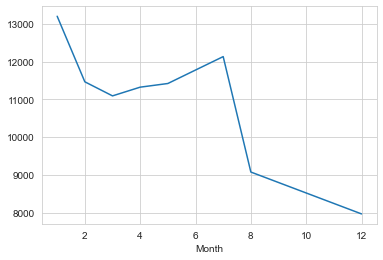

In [116]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

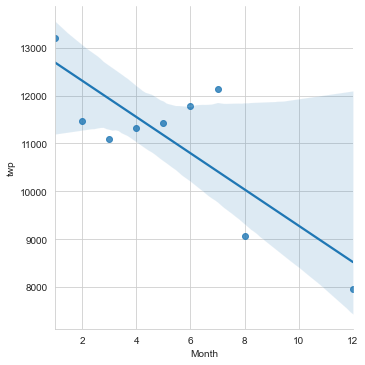

In [117]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index(),fit_reg=True)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [118]:
df['date']= df['timeStamp'].apply(lambda x : x.date())

In [119]:
df

,lat,lng,desc,zip,title,timeStamp,Reason,twp,addr,e,Hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,EMS,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,EMS,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,Fire,NORRISTOWN,HAWS AVE,1,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,EMS,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,EMS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,Traffic,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,Traffic,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,EMS,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,EMS,HORSHAM,WELSH RD & WEBSTER LN,1,11,8,Wed,2016-08-24


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [120]:
dates= df.groupby('date').count()
dates

,lat,lng,desc,zip,title,timeStamp,Reason,twp,addr,e,Hour,Month,Day of Week
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,115,113,115,115,115,115
2015-12-11,396,396,396,333,396,396,396,395,391,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,403,401,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,319,317,319,319,319,319
2015-12-14,447,447,447,387,447,447,447,446,445,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,328,327,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,357,352,357,357,357,357
2016-08-22,389,389,389,336,389,389,389,388,384,389,389,389,389


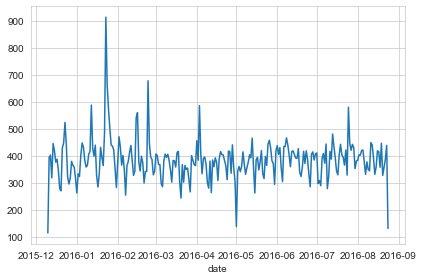

In [121]:
sns.set_style('whitegrid')
dates['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

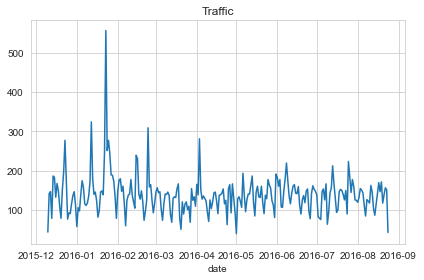

In [125]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

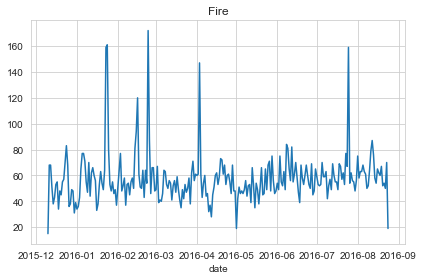

In [127]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [135]:
dayhour = df.groupby(by=['Hour','Day of Week']).count()['Reason'].unstack()
dayhour.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Hour,,,,,,,
0,275,282,375,383,278,269,250
1,235,221,301,306,202,240,216
2,191,201,263,286,233,186,189
3,175,194,260,268,159,170,209
4,201,204,224,242,182,209,156


____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

<AxesSubplot:xlabel='Day of Week', ylabel='Hour'>

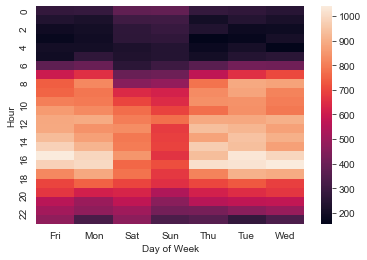

In [136]:
sns.heatmap(data = dayhour)

** Now create a HeatMap using this new DataFrame. **

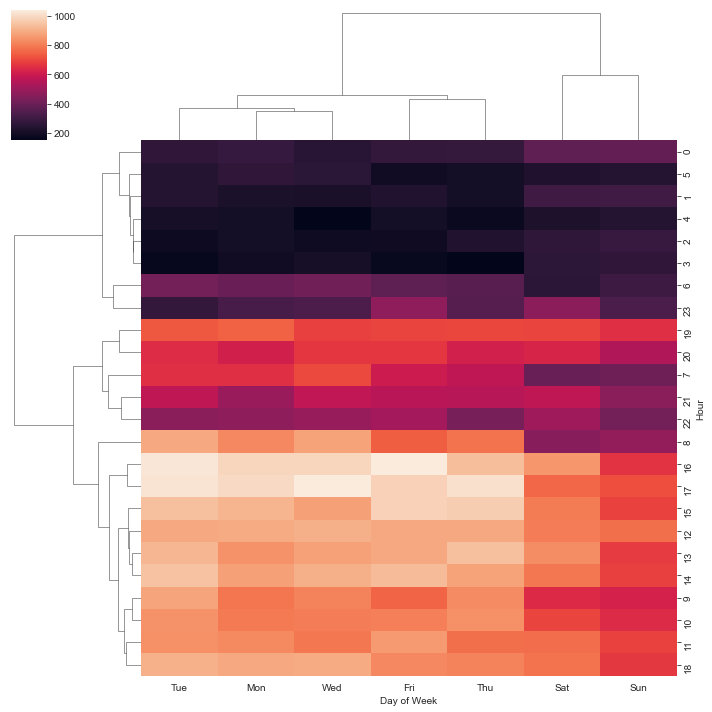

In [137]:
sns.clustermap(data = dayhour)

** Now create a clustermap using this DataFrame. **

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [140]:
month= df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
month

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


**Continue exploring the Data however you see fit!**
# Great Job!